In [ ]:
##요약 알고리즘

In [2]:
pip install tensorflow

     |████████████████████████████████| 195.7 MB 1.6 MB/s eta 0:00:01    |███████████████▋                | 95.4 MB 1.1 MB/s eta 0:01:31     |████████████████████████▍       | 149.4 MB 1.9 MB/s eta 0:00:25
     |████████████████████████████████| 57 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 424 kB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 462 kB 1.8 MB/s eta 0:00:01
  Using cached wrapt-1.12.1.tar.gz (27 kB)
     |████████████████████████████████| 129 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 205 kB/s eta 0:00:01
     |████████████████████████████████| 959 kB 860 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 1.6 MB/s eta 0:00:01
     

In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/tina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#훈련 데이터 - 아마존 리뷰 데이터
data = pd.read_csv("Reviews.csv", nrows = 100000)
print('전체 리뷰 개수 :',(len(data)))

전체 리뷰 개수 : 100000


In [7]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
#원문과 요약 내용 데이터만 사용
data=data[['Text','Summary']]

In [9]:
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [10]:
#랜덤으로 10개의 샘플 출력
data.sample(10)

,Text,Summary
3582,"I rarely eat anything but whole wheat pasta, b...",reminds me of Italy
60498,I absolutely love 5-hour ENERGY! I use it afte...,5-hour ENERGY Highly Recommend!
53227,"this chocolate is a true treat to eat, perfect...",supreme chocolate
21333,Greenies are very muched loved as a tatsy Trea...,Excellent Teeth Cleaner
3885,I love these noodles. They are really great f...,Great and good price!
51521,These are great! As a lover of all chips I'm s...,"Delicious, just like Salt and Vinegar Chips!"
84261,Like other customers I divide these into handf...,"Great snack, great value"
10685,I recommend this instead for the same price: <...,"It's ok, but certainly not worth the cost"
59948,"The noodles were all very broken, but the tast...",Knorr's beef noodles
41032,"Despite claiming they use the ""finest ingredie...",HORRIBLE INGREDIENTS


In [11]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [12]:
# text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플수 :", len(data))

전체 샘플수 : 88426


In [13]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [14]:
# Null 값을 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88425


In [15]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [16]:
# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'him', 'my', 'are', 'mustn', 'against', 'himself', 'how', 'has', 'me', 'between', "aren't", 'that', 'her', 'own', 'these', "wouldn't", 'haven', 'or', 'very', 'because', 'no', "weren't", 'both', 'doesn', 'what', 's', 'any', 'its', 'here', 'shan', 'does', 'ma', 'of', 'the', 'before', 'than', 'where', 'she', 'once', 'other', 'further', 'so', 'if', 'their', 'them', 'until', 'do', 're', 'yourselves', "mustn't", 'is', 'weren', 'it', 'have', 'on', "couldn't", "hasn't", 'only', 'myself', 'll', 'yours', 'had', 'isn', 'doing', 'aren', 'his', 'each', 'were', 'after', 'from', 'he', 'whom', 'an', 'wouldn', 'they', 'ain', 'didn', 'm', 'wasn', "shan't", 'over', 'your', 'did', 'hadn', "shouldn't", 'itself', "you've", 'as', 'you', "isn't", "mightn't", 'by', 'out', 'too', 'theirs', "don't", 'more', 'won', 'with', 'be', 'hasn', 'don', 'for', 'hers', 'was', 'under', 'there', 't', "that'll", 'not', 'd', 'now', "doesn't", 'can', 'in', 'we', "it's", 'all', 'few', 'and', 'couldn', 'during', 'to'

In [17]:
# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my husband (and myself) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [18]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [19]:
# Text 열 전처리
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [20]:
# Summary 열 전처리
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:278: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [21]:
data['Text'] = clean_text
data['Summary'] = clean_summary

In [22]:
# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text        0
Summary    70
dtype: int64


In [23]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88355


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


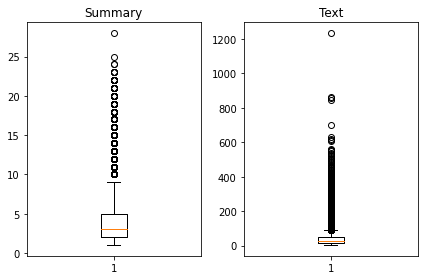

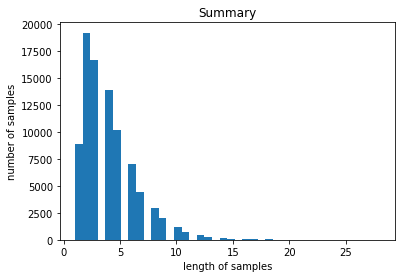

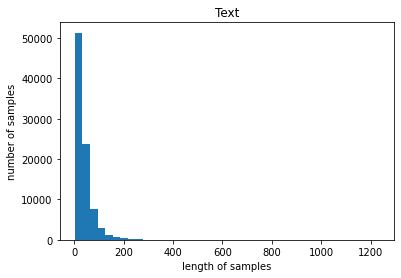

In [24]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
text_max_len = 50
summary_max_len = 8

In [26]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [27]:
below_threshold_len(text_max_len, data['Text'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859


In [28]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [29]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 65818


In [30]:
data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,confection around centuries light pillowy citr...,delight says it all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy


In [31]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [32]:
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [33]:
#train/test 분리를 위해 순서가 섞인 정수 시퀀스 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[61165 60938 37145 ... 45440 26023  1298]


In [34]:
#생성한 시퀀스를 데이터의 샘플 순서로 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [35]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 13163


In [36]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [37]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


In [38]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [39]:
#등장 빈도가 낮은 희귀단어 제거

In [40]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31987
등장 빈도가 6번 이하인 희귀 단어의 수: 23700
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8287
단어 집합에서 희귀 단어의 비율: 74.09260011879826
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.383968496474902


In [41]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [42]:
print(encoder_input_train[:3])

[[632, 179, 39, 1, 4640, 1303, 70, 1393, 7, 57, 980, 414, 361, 20, 447, 255, 54, 7683, 1241, 385, 298, 1772, 147, 39, 3, 49, 4388, 108], [4, 489, 206, 446, 91, 583, 100, 2009, 611, 867, 2202, 138, 2766, 334, 2202, 7, 4523, 871, 54, 446, 138, 55, 208, 611, 2009, 2708, 2766, 33, 446, 35, 2766, 2009, 618, 98, 9, 3147, 2767, 75, 100, 4054], [143, 93, 514, 123, 525, 197, 96, 190, 338, 856, 223, 71, 21, 5086, 394, 394, 239, 15, 531, 197]]


In [43]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [44]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10524
등장 빈도가 5번 이하인 희귀 단어의 수: 8150
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2374
단어 집합에서 희귀 단어의 비율: 77.44203724819461
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.940836959469056


In [45]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [46]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [47]:
print(decoder_input_train[:5])

[[1, 130, 15], [1, 15, 19, 240], [1, 51, 63, 385, 319, 118], [1, 397, 948], [1, 29, 122]]


In [48]:
print(decoder_target_train[:5])

[[130, 15, 2], [15, 19, 240, 2], [51, 63, 385, 319, 118, 2], [397, 948, 2], [29, 122, 2]]


In [49]:
#빈 샘플 확인
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [50]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 1310
삭제할 테스트 데이터의 개수 : 292


In [51]:
#빈 샘플 삭제 후
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 51345
훈련 레이블의 개수 : 51345
테스트 데이터의 개수 : 12871
테스트 레이블의 개수 : 12871


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [52]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

In [53]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [54]:
pip install numpy==1.19.5

     |████████████████████████████████| 15.6 MB 1.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
Note: you may need to restart the kernel to use updated packages.


In [55]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [56]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [57]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [58]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [59]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [60]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
201/201 [==============================] - 332s 2s/step - loss: 2.1833 - val_loss: 2.0975
Epoch 2/50
201/201 [==============================] - 329s 2s/step - loss: 2.0816 - val_loss: 2.0263
Epoch 3/50
201/201 [==============================] - 329s 2s/step - loss: 2.0124 - val_loss: 1.9837
Epoch 4/50
201/201 [==============================] - 580s 3s/step - loss: 1.9579 - val_loss: 1.9490
Epoch 5/50
201/201 [==============================] - 348s 2s/step - loss: 1.9101 - val_loss: 1.9316
Epoch 6/50
201/201 [==============================] - 3233s 16s/step - loss: 1.8694 - val_loss: 1.9158
Epoch 7/50
201/201 [==============================] - 795s 4s/step - loss: 1.8321 - val_loss: 1.8893
Epoch 8/50
201/201 [==============================] - 348s 2s/step - loss: 1.7963 - val_loss: 1.8769
Epoch 9/50
201/201 [==============================] - 335s 2s/step - loss: 1.7635 - val_loss: 1.8649
Epoch 10/50
201/201 [==============================] - 340s 2s/step - loss: 1.7319 - val_

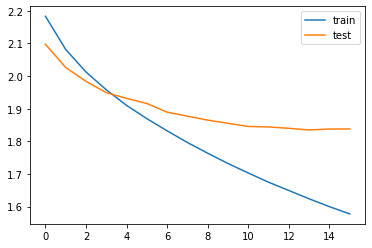

In [64]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [65]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [66]:
#encoder 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])


In [67]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


In [68]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [69]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [70]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [71]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  husband absolutely love gum actually good keeps flavor long time 
실제 요약문 : awesome 
예측 요약문 :  great product


원문 :  love able get food go england get good price heinz salad cream original ounce squeeze bottle 
실제 요약문 : heinz salad cream 
예측 요약문 :  great product


원문 :  almost say much sugar appropriate description fresh brand indian sweets products ordered varieties product presentation appealing indeed products contain unwanted chemicals preservatives use sugar cheap compensate missing ingredients say least disappointed product offerings buy products convince reduced sugar content sweets line excellent packaging prompt shipping 
실제 요약문 : too sweet 
예측 요약문 :  good stuff


원문 :  bought bought bowl pop white hull less popcorn got thru amazon bought metal shaker fine small holes season popcorn works great thanks amazon web site 
실제 요약문 : love it 
예측 요약문 :  not the best


원문 :  would say fair good ice cream topping chocolate fresh raspberries mixed really gets stars two reasons first

예측 요약문 :  best chai tea


원문 :  read web site hcg hard find ingredients salad dressing sugars added husband usually uses packaged dry mix really liked instead regular mix use oil tastes great 
실제 요약문 : great product 
예측 요약문 :  not as good as other seeds


원문 :  like ever knew brand asked greek coffee appeared stuff great authentic find greek imports store even price great stuff know equivalent hunting use espresso machine get caffeine fix least kick price point maintenance travel 
실제 요약문 : just like my mom makes 
예측 요약문 :  great taste


원문 :  tried quite types extracts far best tried wish sold sizes amazon 
실제 요약문 : quality 
예측 요약문 :  best ever


원문 :  bars delicious nuts great honey flavor came dark chocolate spot problem texture ordered middle summer chocolate melted around wrapper hope better results ordering winter 
실제 요약문 : delicious but wait fall 
예측 요약문 :  best chocolate bar ever


원문 :  bought health food store reason like smell smelled like flowers could get past enough keep s

예측 요약문 :  delicious


원문 :  dog food dog eat favorite good dog food 
실제 요약문 : this dog food is or good 
예측 요약문 :  dog loves it


원문 :  huge fan canned coffee drinks always looking easy coffee drink tasted okay weird aftertaste cannot quite describe size adequate definitely purchasing future like convenient ok tasting coffee go 
실제 요약문 : illy issimo coffee drink 
예측 요약문 :  not so good


원문 :  husband drinking choice organic japanese green tea several years pleased results gets read article benefits drinking japanese green tea made joints overall health lot better drinks cups day 
실제 요약문 : great tea 
예측 요약문 :  great product


원문 :  looking locally animal themed cake topper baby shower saw edible one amazon inexpensive shipped quickly lasted weeks package used everyone commented adorable looked cake would highly recommend anyone seeking animal theme 
실제 요약문 : animal edible cake 
예측 요약문 :  best thing ever


원문 :  little plums hard find live please get varieties seed sweet salty hawaii kill

예측 요약문 :  great product


원문 :  one best brews ever tried since bought keurig trying dozen different kinds blends coffee plus dark milk chocolate different tea top list two favorite kinds coffee amazon 
실제 요약문 : green mountain dark magic coffee for keurig 
예측 요약문 :  best coffee


원문 :  thought came two one bucks normal grocery store please go local store buy follow path paying twice much something want yes getting one star order along company sells price hate wheat 
실제 요약문 : do not pay this price 
예측 요약문 :  too expensive


원문 :  husband love taste soo good fresh microwave pleased see pack find packs local grocery store economical 
실제 요약문 : yummy 
예측 요약문 :  great value


원문 :  keurig storage drawer perfect match coffee maker coffee machine sits perfectly top makes getting refills soooo easy looked storage options found ideal really glad bought 
실제 요약문 : perfection 
예측 요약문 :  great product


원문 :  searching years better sauce pizza quick tried many brands end going back thick nice tomato

예측 요약문 :  not worth the money


원문 :  use coconut milk light vanilla bean tsp vanilla extract tsp sweetening package tapioca cups water heat simmer minutes mix let cool comes perfect every time gluten free sugar free low fat love 
실제 요약문 : great coconut milk 
예측 요약문 :  coconut water


원문 :  terrible product tastes like cocoa water coconut water flavor taste plus bottom bottle chunks cocoa beware chocolate lovers disappointed 
실제 요약문 : terrible 
예측 요약문 :  not as advertised


원문 :  love tea gave caffeine several months ago drink morning several previous stated ingredients tea must reformulated box states artificial flavors tea awesome 
실제 요약문 : great 
예측 요약문 :  great tea


원문 :  recieved one bars influenster voxbox love warmed microwave seconds took smell amazing little nutty side super soft went well morning coffee little sweet size bar rather small plan purchasing box future 
실제 요약문 : yum 
예측 요약문 :  great breakfast bars


원문 :  love coffee better others pricy cannot find anywhere else 

예측 요약문 :  my dog loves this


원문 :  dog loves dingo bones good stuff dental bones much different original pack dog goes nuts last hour help doggy breath great dental treat 
실제 요약문 : this is the good stuff 
예측 요약문 :  my dogs love these


원문 :  really love oatmeal raisin cookies ordered pamela really bad dry tasteless seemed old going back pamela oatmeal raisin find 
실제 요약문 : dry and awful 
예측 요약문 :  not gluten free


원문 :  good coffe good value tried others stick one tried others stuck one 
실제 요약문 : good 
예측 요약문 :  good coffee


원문 :  using soap years loving dr even commented soft healthy previous problem skin hair problems dry spending fortune different products one day washed soap one bar hair one washing hair shinier ever totally gone moisture returned save money buying products one 
실제 요약문 : great for hair too 
예측 요약문 :  too much


원문 :  using pretty much since birth great product gsd owners right amount protein produces shiny coat lots energy choke free eating love plan move adult 

예측 요약문 :  my cat loves this


원문 :  really like bars taste texture really good however consistency bars somewhat sticky learned eat wipe hands wash 
실제 요약문 : good alternative for gluten free snack 
예측 요약문 :  good snack


원문 :  tried costco could find anymore finally found amazon loves help breath teeth 
실제 요약문 : hard to find she loves them 
예측 요약문 :  my dog loves these


원문 :  family loves popcorn amish country popcorn wonderful tender tasty delightful love nearly hull less kernels tiny size popped product good enjoy watching movies even reading good book 
실제 요약문 : to die for 
예측 요약문 :  great popcorn


원문 :  best line products helped clear acne noticed slowly use aloe green tea day washing face bed use jasmine vitamin cream skin important fragile take care right 
실제 요약문 : wonderful stuff 
예측 요약문 :  great product


원문 :  others already said snack size though say anywhere end probably better since usually keep day since smaller less overall 
실제 요약문 : smaller than expected 
예측 요약문 :  grea

예측 요약문 :  great product


원문 :  came time good shape wish bottles packaged time good condition thank 
실제 요약문 : good 
예측 요약문 :  great product


원문 :  jerky used wonder cannot find local stores horrible chemical taste unfortunately case bought garbage waste money stuff inedible 
실제 요약문 : do not buy it 
예측 요약문 :  disgusting


원문 :  always liked gloria jean coffee butter toffee exceptionally delicious opportunity try really missing easy way order amazon came early gotta love 
실제 요약문 : yummy 
예측 요약문 :  best coffee ever


원문 :  avid consumer jack links beef steak nuggets batch stale dry almost tasteless purchase even remote gas stations taste juicy wonderful lazy return never buy internet 
실제 요약문 : stale 
예측 요약문 :  stale


원문 :  tried sips start pouring surprised dark color proper espresso sweet bit bitter time basically espresso sugar sweetness say favorite able drink sure switching regular choice cream added try bad probably ideal people like coffee strong black hint sweet since flavors de

예측 요약문 :  great gift


원문 :  bought one thinking would try go back worked cute buying stay fresh baby food containers much better cheaper stay fresh containers hold ounces go straight microwave food frozen find difficult sometimes get portion food beaba container best design totally overpriced 
실제 요약문 : not worth the money 
예측 요약문 :  my cats love this food


원문 :  buying least eight years must work well year dog teeth clean new puppy would recommend anyone 
실제 요약문 : re order 
예측 요약문 :  great product


원문 :  cans notch flavor izze bottles buying cans case much economical drinking oz rather oz lower calorie choice glad find cases amazon com 
실제 요약문 : refreshing and convenient 
예측 요약문 :  great product


원문 :  drink tea right morning walk makes difference feel love know something good also refreshing 
실제 요약문 : love this tea 
예측 요약문 :  great tea


원문 :  first blue plate mayonnaise years ago traveling job south restaurant sandwich mayo good asked kind mayo told blue plate living south time c

예측 요약문 :  not as good as the chocolate


원문 :  love seasoning easy fast great chicken fish pork etc melt stick butter stir seasoning becomes loose paste brush protein hot pan cast iron best always skin side dark place oven cooked correct temp enjoy 
실제 요약문 : best seasoning 
예측 요약문 :  great stuff


원문 :  eating several years definitely superior non microwave kind shake bag directed make sure stacked put popcorn setting microwave soooo good 
실제 요약문 : microwave bacon curls are great 
예측 요약문 :  great taste


원문 :  popcorn tastes ok pop way small like whole bowl bottom tub popcorn crumbs regular orville redenbacher popcorn much better 
실제 요약문 : pop too small 
예측 요약문 :  not bad


원문 :  pretty disappointed incredibly dry point almost crumbly mouth also thought flavor could better made jerky tastes much better 
실제 요약문 : very dry kinda crumbly 
예측 요약문 :  not that great


원문 :  used love eating kid enjoyed exciting fizz candy however version candy kick fizz hardly noticeable unless tongue sensit

예측 요약문 :  best tea ever


원문 :  personal tastes vary one favorite ready drink shakes lean body shakes consistency milk mixed well minimal aftertaste fan really thick shakes probably appeal looking shake provides nice level protein vitamins price good choice looking post workout shake easily digested minutes hard workout 
실제 요약문 : great shake and great value 
예측 요약문 :  nice drink


원문 :  trouble locating apple chips locally happy find good price amazon love chicken salad chain restaurant sells apple chips top wanted try recipe home work well taste great issue really healthy option thought contain oil sugar bringing calorie content per bag better eat apple mighty tasty snack 
실제 요약문 : taste great 
예측 요약문 :  these are the best chips ever


원문 :  cups usable stated exactly looking less expensive method coffee leak slightly bad sure makes hole little larger prepackaged cups high side get coffee want way want great 
실제 요약문 : good product 
예측 요약문 :  great coffee


원문 :  drink lot tea mean lot

예측 요약문 :  not good


원문 :  perfect size one yummy satisfying tv snack diet box four individual bags takes minutes micro 
실제 요약문 : delicious low cal snack 
예측 요약문 :  great snack


원문 :  sigh kind hate cannot really bring use still planted basil seeds supply yet needs cheese still dark oily recommended may pinch lieu dried basil buy 
실제 요약문 : oh too for this product 
예측 요약문 :  great product


원문 :  imagine pound mastiff boxer mix pound min pin mix pound rat terrier fighting dinosaur chew toy pretty picture ordered one okay still fight much whoever easily find another dinosaur claim dinosaurs fantastic helping teeth stay white keep gums happy last long time definite must 
실제 요약문 : the best 
예측 요약문 :  my dog loves this


원문 :  bit sour taste definitely best ever prefer much 
실제 요약문 : decent but not great 
예측 요약문 :  great


원문 :  buffalo right amount heat flavor combined wish could buy flavor could put wings good product 
실제 요약문 : great flavor 
예측 요약문 :  good flavor


원문 :  im learning amer

예측 요약문 :  gummi bears


원문 :  nothing wrong please keep mind haribo gummies purchased different countries drastically different ingredients considered healthy snacks germany made real fruit juice even haribo brand gummies purchased made fruit juice disappointed cannot get niece eating germany best gummi 
실제 요약문 : buyer beware 
예측 요약문 :  not as pictured


원문 :  excellent coffee nice able get costa rican coffee without paying fortune shipping 
실제 요약문 : excellent coffee 
예측 요약문 :  great coffee


원문 :  excellent taste quality great love natural organic price bargain definitely order 
실제 요약문 : fabulous 
예측 요약문 :  great product


원문 :  received order extremely fast exactly wanted plus bars work awesome running run 
실제 요약문 : great product fast shipment 
예측 요약문 :  great product


원문 :  buy jerky time always willing try something new even made home agree review called salt sticks way salty taste also jerky eater years eat like chewiness jerk tube got nearly un chewable bit hard jerky time liter

In [73]:
model.save('model.h5')

In [74]:
model2 = tf.keras.models.load_model('model.h5')

NameError: name 'tf' is not defined

In [75]:
import tensorflow as tf

In [76]:
import keras

In [78]:
model2 = keras.models.load_model('model.h5')

ValueError: Unknown layer: AttentionLayer. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [90]:
df = pd.read_csv("textorg.csv",encoding='cp949')

In [91]:
df

,Unnamed: 0,내용,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,They say he was arrested today\nShame of other...,NaN,NaN,NaN,NaN
1,1,"Hello, I'm glad that the investigation into Te...",NaN,NaN,NaN,NaN
2,2,I implore the Democrats and the government. Ev...,NaN,NaN,NaN,NaN
3,3,"Due to the coronavirus19, all Koreans are in a...",NaN,NaN,NaN,NaN
4,4,"Moon Jae-in, as one of the people urging the p...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
218,219,Hello. I'm a student currently attending a uni...,NaN,NaN,NaN,NaN
219,220,I am a housewife in my 40s living in the same ...,NaN,NaN,NaN,NaN
220,221,I am a missionary of the Korean Holiness Churc...,NaN,NaN,NaN,NaN
221,222,Looking at the direction of corona regulation ...,NaN,NaN,NaN,NaN


In [116]:
df=df[['내용']]

In [119]:
encoder_input = np.array(df['내용']) #청원 데이터 넣으셈

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)


[ 20  22 134 193  48  65   1  75 102 108  14  43 174  66 114 212 147  88
 166 205 111 164  91 175  79 199  85  19   9 179  56  33  74  57 206  97
  27 112  10 131 209  18 215 217 185   3  44   4 188  76  82  78 184 101
  70 169  42  69 144  98  60 124  61 198  86  90 168 159 163  36 127 150
  53 156  51 106 110  81 183  47 105 129 136 173 130 165  71  13  35  77
 138   2 189 208 210  73 190 148 122 121 170  52  87 117  24 196  38 158
 176 157  50 194  40 180 149 100 172 187 177 178  67   8 195 216 207  68
  45  23  49 103 162  94 133 142  89 141 191 139 104  95  17 107  12 167
  63  15 143  11 132  16  25 123 137  72 214 160 204 146  58 201 155  64
 145  46 152 126 125 115  59  28 120 161 153 202  34  41 211   5  29   6
  54   7 192  55  32  39 171  83  31 197  62 140 200  80  26 118  21 154
  92  93 181  84  30  96 116  37 213  99 128 186 113   0 151 182 119 203
 135 109]
테스트 데이터의 수 : 43


In [120]:
encoder_input = encoder_input[indices]
encoder_input_test = encoder_input[-n_of_val:]
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)
encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')

IndexError: index 52 is out of bounds for axis 0 with size 43

In [121]:
encoder_input_test = encoder_input[-n_of_val:]
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)
#encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')

In [125]:
for i in range(1,100):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 요약문 :  great product


원문 :  
예측 

IndexError: index 43 is out of bounds for axis 0 with size 43